In [5]:
import pickle
from graphviz import Digraph
import os
import datetime
import numpy as np
import gc

In [6]:
def _make_node_text(node_i):
    #print(node_i["data"].keys())
    t_left = node_i["data"]["t_left"]
    t_right = node_i["data"]["t_right"]
    t_left_str = datetime.datetime.fromtimestamp(t_left).strftime("%m/%d/%y")
    t_right_str = datetime.datetime.fromtimestamp(t_right).strftime("%m/%d/%y")
    dt_str = "%.1f"%((t_right-t_left)/(3600*24))
    if("t0" in node_i["data"]): 
        t0 = node_i["data"]["t0"]
        t0_str = datetime.datetime.fromtimestamp(t0).strftime("%m/%d/%y")
        alpha = node_i["data"]["alpha"]
        ratio = np.maximum(node_i["data"]["ratio"], 1.-node_i["data"]["ratio"])
    else:
        t0_str = "N/A"
        
    s = "From: %s\nTo: %s\nDur: %s d\n"%(t_left_str, t_right_str, dt_str)
    if("t0" in node_i["data"]): s = s + "Change: %s\nAlpha: %.4f\nMaj: %.4f"%(t0_str, alpha, ratio)
    
    return s

def _rec_show_tree(node_i, node_idx, dot, dot_info):
    node_label = "%d"%(node_idx)
    node_text = node_label

    #if(node_i.left != None): feature = node_i.split_feature
    #else: feature = -1
    
    node_list = []
    if(node_i["left"] is None):
        print(dot_info[0],node_i["data"]["t_left"], node_i["data"]["t_right"])
        node_list.append((node_i["data"]["t_left"], node_i["data"]["t_right"]))
    
    dot.node(node_label, _make_node_text(node_i), style="filled", fillcolor="#B8F0B2")
    
    if(node_i["left"] != None):
        dot_info[0]+=1
        left_idx = dot_info[0]
        left_label = "%d"%(left_idx)
        left_text = left_label
        dot.node(left_label, left_text)
        dot.edge(node_label, left_label)
        tmp = _rec_show_tree(node_i["left"], left_idx, dot, dot_info)
        node_list = node_list + tmp
        
    if(node_i["right"] != None):
        dot_info[0] += 1
        right_idx = dot_info[0]
        right_label = "%d"%(right_idx)
        right_text = right_label
        dot.node(right_label, right_text)
        dot.edge(node_label, right_label)
        tmp = _rec_show_tree(node_i["right"], right_idx, dot, dot_info)
        node_list = node_list + tmp
    
    return node_list


def show_tree(root, fname):
    fname_split = os.path.splitext(fname)
    fname_pref, fname_suf = fname_split[0], fname_split[1][1:]
    dot = Digraph(node_attr={'shape': 'box'}, format=fname_suf)
    dot.node("0", "root")
    node_list = _rec_show_tree(root, 0, dot, [0])
    dot.render(fname_pref, view=False)
    return dot, node_list


3 1579673919.0 1580439104.816686
5 1580439104.816686 1580818649.6154416
6 1580818649.6154416 1581414913.3818629
9 1581414913.3818629 1581872408.5067313
10 1581872408.5067313 1582348768.33904
11 1582348768.33904 1582924289.7562869
13 1582924289.7562869 1583367551.8720562
16 1583367551.8720562 1583746456.9223535
17 1583746456.9223535 1584300651.2196429
19 1584300651.2196429 1585053567.9104087
20 1585053567.9104087 1585724331.0


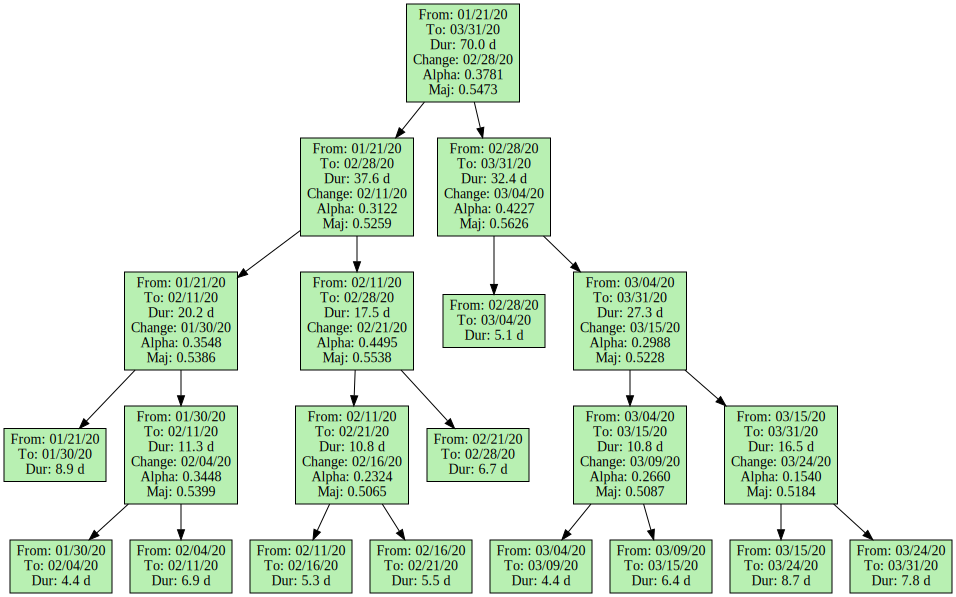

In [7]:
path = "./change_tree_tfidf.pkl"
tree = pickle.load(open(path, "rb"))
tmp, node_list = show_tree(tree, "./change_tree_tfidf.pdf")
tmp